In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [16]:
df = pd.read_csv('/content/ecg_autoencoder_dataset.csv').dropna()
df = df.drop(['1'], axis=1)
df

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.16034772,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.214931,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-0.72744815, -1.62389074, -1.29367885, ...,  0.76192792,
         0.8779844 , -0.51577939],
       [-0.26426901, -0.6529868 , -0.9967723 , ...,  0.51844697,
         0.76034561,  0.20147491],
       [ 0.6533956 , -0.18320591, -0.81076726, ...,  0.93025233,
         1.03275956,  0.22850652],
       ...,
       [-0.74661735, -0.41740186, -0.2706857 , ..., -1.19999481,
        -0.83038581, -0.77885584],
       [-0.24744967, -0.16600568, -0.25059717, ...,  1.02412061,
         0.89482113,  1.0688155 ],
       [-0.94515979, -0.38701748, -0.02009505, ..., -0.86971595,
        -0.59524038,  0.01571247]])

In [18]:
x_train,x_test = train_test_split(df,test_size=0.2,random_state=42)

In [19]:
print(x_train.shape)
# print(y_train.shape)
print(x_test.shape)

(3997, 140)
(1000, 140)


In [22]:
model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),

        #decoder
        Dense(32,activation='relu'),
        Dense(64,activation='relu'),
        Dense(x_train.shape[1], activation='linear') # Output layer with the same shape as input
    ]
)

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 140)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,388 (91.36 KB)

 Trainable params: 23,388 (91.36 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=30,
    validation_data=(x_test,x_test),
    shuffle=True
)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0725 - val_loss: 0.0977
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0722 - val_loss: 0.0939
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0763 - val_loss: 0.0903
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0667 - val_loss: 0.0895
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0674 - val_loss: 0.0916
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0647 - val_loss: 0.0878
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0618 - val_loss: 0.0889
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0629 - val_loss: 0.0915
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0619 - val_loss: 0.0885
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0691 - val_loss: 0.0866
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0700 - val_loss: 0.0876
Epoch 12/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

<Axes: >

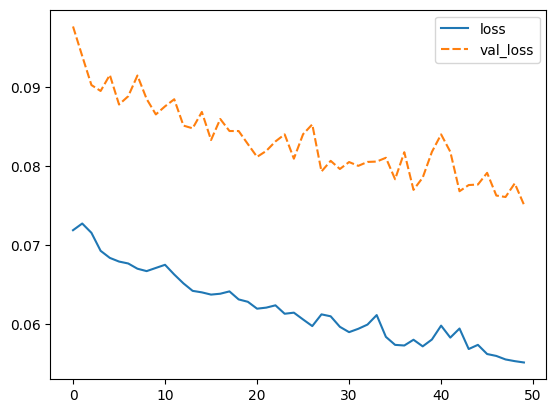

In [26]:
import seaborn as sns
sns.lineplot(model.history.history)

In [27]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


np.float64(0.18947127891243618)

In [28]:
anomalies = mse > threshold

In [29]:
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


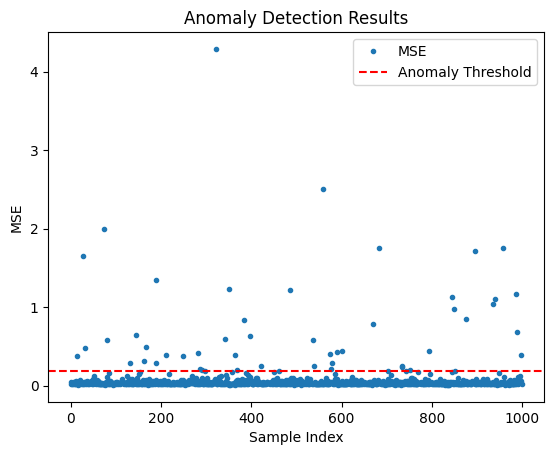

In [30]:
#Plot the anomalies
import matplotlib.pyplot as plot

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

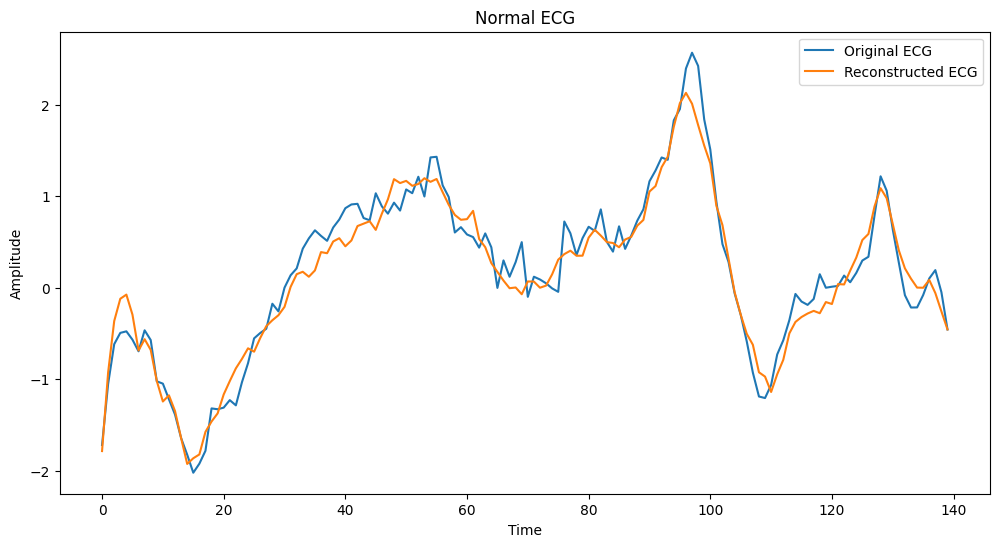

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

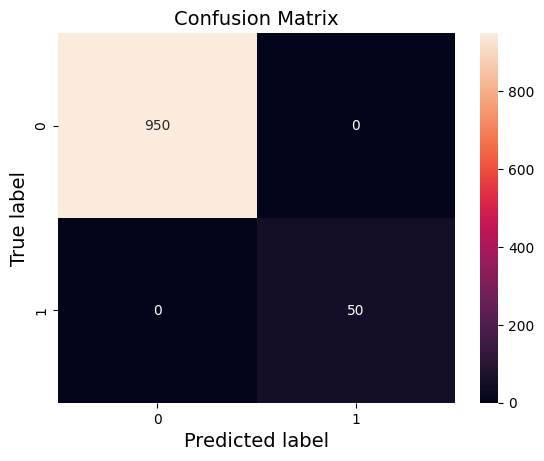

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()